# Takeaways

Moderating ~60% of the  time.

Top 5 Strategies
| Combination | Count | Num_Strategies |
|-------------|-------|----------------|
| Clarify Child's Intent | 4 | 1 |
| Tailor to Age Group | 4 | 1 |
| Defer to Parents + Emphasize Emotional Support | 3 | 2 |
| Emphasize Emotional Support + Encourage Introspection | 2 | 2 |
| Emphasize Emotional Support + Tailor to Age Group | 2 | 2 |

In [ ]:
# Install required packages (uncomment and run if needed)
!pip install pandas matplotlib seaborn

# Note: json and collections are built-in Python modules and don't need installation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter
import seaborn as sns
import pandas as pd

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [4]:
# Load the data
df = pd.read_csv('moderation_sessions_export_20251103_120053.csv')

print(f"Total records: {len(df)}")
print(f"\nFirst few rows of strategies column:")
print(df['strategies'].head(10))


Total records: 122

First few rows of strategies column:
0                                                   []
1                                                   []
2                                                   []
3                                                   []
4    ["Emphasize Emotional Support", "Defer to Pare...
5                                                   []
6    ["Defer to Parents", "Emphasize Emotional Supp...
7    ["Emphasize Emotional Support", "Encourage Int...
8    ["Tailor to Age Group", "Defer to Parents", "D...
9    ["Emphasize Emotional Support", "Clarify Child...
Name: strategies, dtype: object


In [ ]:
# Parse the strategies column (it contains JSON arrays)
def parse_strategies(strategies_str):
    """Parse strategies string into a list"""
    try:
        if pd.isna(strategies_str) or strategies_str == '':
            return []
        return json.loads(strategies_str)
    except:
        return []

df['strategies_parsed'] = df['strategies'].apply(parse_strategies)

# Show some examples
print("Parsed strategies examples:")
for idx, strategies in df['strategies_parsed'].head(10).items():
    print(f"Row {idx}: {strategies}")


## 1. Individual Strategy Counts


In [ ]:
# Count individual strategies
all_strategies = []
for strategies_list in df['strategies_parsed']:
    all_strategies.extend(strategies_list)

strategy_counts = Counter(all_strategies)

# Convert to DataFrame for easier plotting
individual_df = pd.DataFrame([
    {'Strategy': strategy, 'Count': count}
    for strategy, count in strategy_counts.most_common()
])

print(f"\nTotal unique strategies: {len(individual_df)}")
print(f"Total strategy uses: {individual_df['Count'].sum()}")
print("\nStrategy counts:")
print(individual_df)



Total unique strategies: 12
Total strategy uses: 75

Strategy counts:
                       Strategy  Count
0           Tailor to Age Group     17
1   Emphasize Emotional Support     15
2        Clarify Child's Intent     14
3              Defer to Parents      7
4            Defer to Resources      5
5    Explain Problems in Prompt      5
6       Encourage Introspection      3
7    Redirect with Alternatives      3
8        Remove Harmful Phrases      2
9   Refuse Response and Explain      2
10     Emphasize Risk Awareness      1
11  Omit Unprompted Suggestions      1


In [ ]:
# Plot individual strategy counts
plt.figure(figsize=(14, 8))
plt.barh(individual_df['Strategy'], individual_df['Count'], color='steelblue')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Strategy', fontsize=12)
plt.title('Individual Strategy Counts', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest count at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)

# Add count labels on bars
for i, (strategy, count) in enumerate(zip(individual_df['Strategy'], individual_df['Count'])):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=10)

plt.show()


## 2. Strategy Combinations (Order-Independent)


In [ ]:
# Count strategy combinations (order doesn't matter, so we'll use frozenset)
def strategies_to_combination(strategies_list):
    """Convert list to frozenset for order-independent comparison"""
    if not strategies_list:
        return frozenset(['[No strategies]'])
    return frozenset(strategies_list)

df['strategy_combination'] = df['strategies_parsed'].apply(strategies_to_combination)

combination_counts = Counter(df['strategy_combination'])

# Convert combinations to readable strings for plotting
combination_data = []
for combo, count in combination_counts.most_common():
    if combo == frozenset(['[No strategies]']):
        combo_str = '[No strategies]'
    else:
        combo_str = ' + '.join(sorted(combo))
    combination_data.append({'Combination': combo_str, 'Count': count, 'Num_Strategies': len(combo)})

combinations_df = pd.DataFrame(combination_data)

print(f"\nTotal unique combinations: {len(combinations_df)}")
print(f"\nTop 20 combinations:")
print(combinations_df.head(20))



Total unique combinations: 28

Top 20 combinations:
                                          Combination  Count  Num_Strategies
0                              Clarify Child's Intent      4               1
1                                 Tailor to Age Group      4               1
2      Defer to Parents + Emphasize Emotional Support      3               2
3   Emphasize Emotional Support + Encourage Intros...      2               2
4   Emphasize Emotional Support + Tailor to Age Group      2               2
5        Clarify Child's Intent + Tailor to Age Group      2               2
6   Clarify Child's Intent + Emphasize Emotional S...      2               3
7                         Refuse Response and Explain      2               1
8                                  Defer to Resources      2               1
9                         Emphasize Emotional Support      2               1
10  Defer to Parents + Defer to Resources + Tailor...      1               3
11  Clarify Child's Int

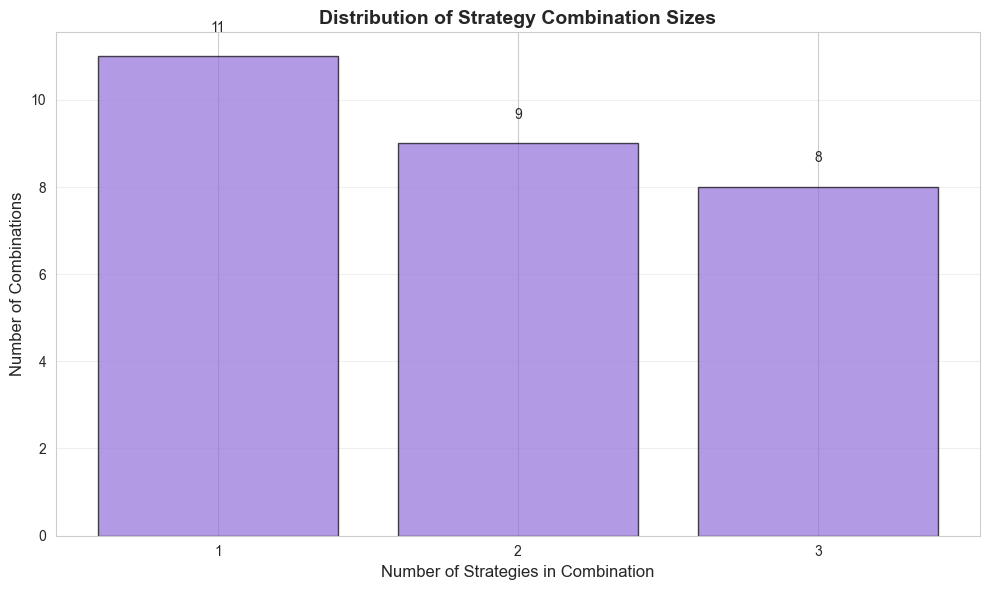


Distribution of number of strategies per combination:
Num_Strategies
1    11
2     9
3     8
Name: count, dtype: int64


In [ ]:
# Plot distribution of number of strategies in combinations
plt.figure(figsize=(10, 6))
num_strategies_dist = combinations_df['Num_Strategies'].value_counts().sort_index()
plt.bar(num_strategies_dist.index, num_strategies_dist.values, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Strategies in Combination', fontsize=12)
plt.ylabel('Number of Combinations', fontsize=12)
plt.title('Distribution of Strategy Combination Sizes', fontsize=14, fontweight='bold')
plt.xticks(num_strategies_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for x, y in zip(num_strategies_dist.index, num_strategies_dist.values):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nDistribution of number of strategies per combination:")
print(num_strategies_dist)


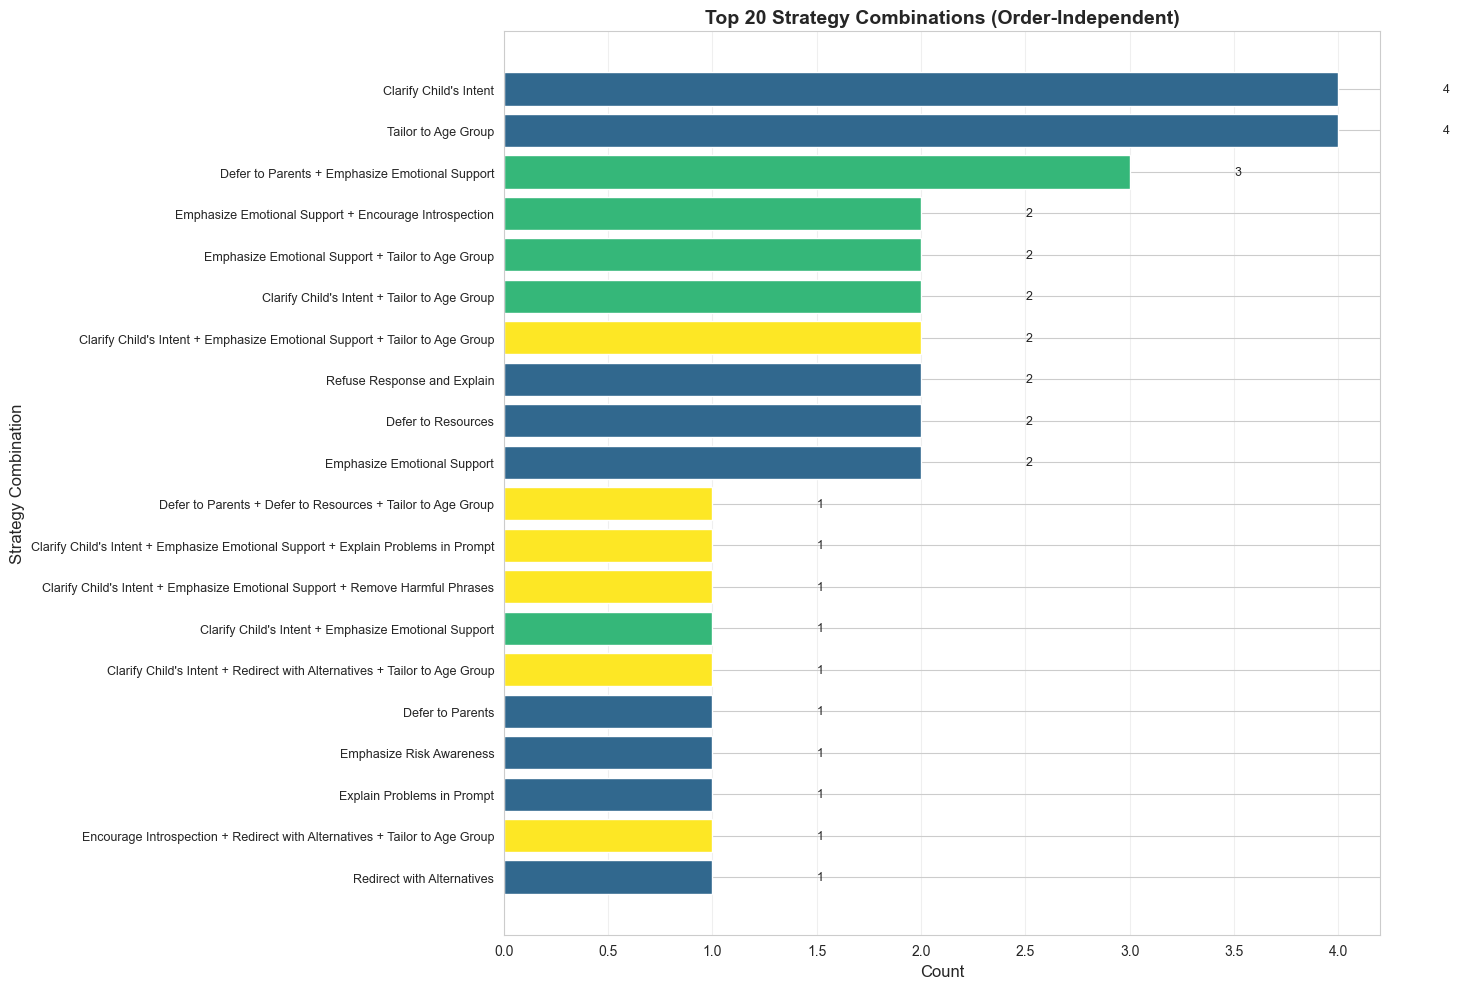

In [ ]:
# Plot top 20 strategy combinations
top_n = min(20, len(combinations_df))
plot_data = combinations_df.head(top_n)

plt.figure(figsize=(14, 10))
colors = plt.cm.viridis(plot_data['Num_Strategies'] / plot_data['Num_Strategies'].max())
plt.barh(range(len(plot_data)), plot_data['Count'], color=colors)
plt.yticks(range(len(plot_data)), plot_data['Combination'], fontsize=9)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Strategy Combination', fontsize=12)
plt.title(f'Top {top_n} Strategy Combinations (Order-Independent)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest count at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)

# Add count labels on bars
for i, count in enumerate(plot_data['Count']):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=9)

plt.show()


In [11]:
# Plot all combinations if there aren't too many
if len(combinations_df) <= 30:
    plt.figure(figsize=(14, max(8, len(combinations_df) * 0.4)))
    colors = plt.cm.viridis(combinations_df['Num_Strategies'] / combinations_df['Num_Strategies'].max())
    plt.barh(range(len(combinations_df)), combinations_df['Count'], color=colors)
    plt.yticks(range(len(combinations_df)), combinations_df['Combination'], fontsize=9)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Strategy Combination', fontsize=12)
    plt.title('All Strategy Combinations (Order-Independent)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.grid(axis='x', alpha=0.3)
    
    for i, count in enumerate(combinations_df['Count']):
        plt.text(count + 0.5, i, str(count), va='center', fontsize=9)
    
    plt.show()
else:
    print(f"Too many combinations ({len(combinations_df)}) to display all at once.")
    print("Showing top 20 above.")


## 3. Summary Statistics


Summary Statistics:

Total sessions: 122
Sessions with no strategies: 79
Sessions with strategies: 43

Strategies per session:
count    122.000000
mean       0.614754
std        0.957327
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: num_strategies, dtype: float64


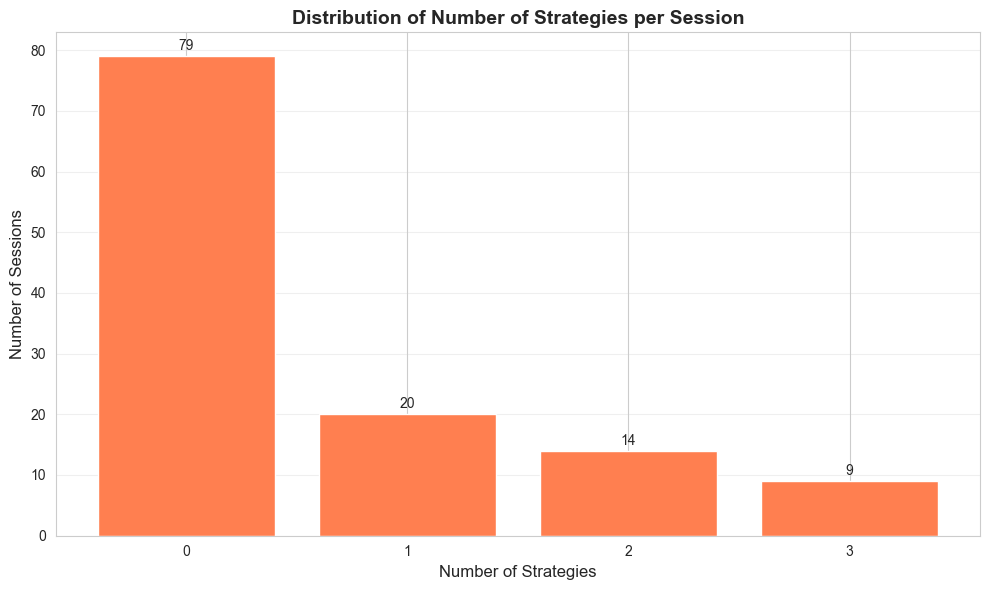

In [12]:
# Calculate summary statistics
df['num_strategies'] = df['strategies_parsed'].apply(len)

print("Summary Statistics:")
print(f"\nTotal sessions: {len(df)}")
print(f"Sessions with no strategies: {(df['num_strategies'] == 0).sum()}")
print(f"Sessions with strategies: {(df['num_strategies'] > 0).sum()}")
print(f"\nStrategies per session:")
print(df['num_strategies'].describe())

# Distribution of number of strategies per session
plt.figure(figsize=(10, 6))
strategy_count_dist = df['num_strategies'].value_counts().sort_index()
plt.bar(strategy_count_dist.index, strategy_count_dist.values, color='coral')
plt.xlabel('Number of Strategies', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.title('Distribution of Number of Strategies per Session', fontsize=14, fontweight='bold')
plt.xticks(strategy_count_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for x, y in zip(strategy_count_dist.index, strategy_count_dist.values):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
